In [1]:
from collections import Counter # se usará? la saqué del notebook "pandas introduccion"
import requests # se usará? la saqué del notebook "pandas introduccion"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from matplotlib import pyplot as plt
from pandas_profiling import ProfileReport

from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import (
    KBinsDiscretizer,
    LabelEncoder,
    MinMaxScaler,
    Normalizer,
    OneHotEncoder,
    OrdinalEncoder,
    PowerTransformer,
    RobustScaler,
    StandardScaler,
)

In [3]:
with requests.get(
    "https://docs.google.com/spreadsheets/d/1-DWTP8uwVS-dZY402-dm0F9ICw_6PNqDGLmH0u8Eqa0/export?format=csv"
) as r, open("fiufip_dataset.csv", "wb") as f:
    for chunk in r.iter_content():
        f.write(chunk)
        

In [4]:
import pandas as pd
df = pd.read_csv("fiufip_dataset.csv")

## Veamos de que consta el dataset provisto

In [5]:
df.head()

,anios_estudiados,barrio,categoria_de_trabajo,edad,educacion_alcanzada,estado_marital,ganancia_perdida_declarada_bolsa_argentina,genero,horas_trabajo_registradas,religion,rol_familiar_registrado,tiene_alto_valor_adquisitivo,trabajo
0,17,Palermo,empleado_provincial,39,universidad_3_anio,sin_matrimonio,2174,hombre,40,cristianismo,sin_familia,0,entretenimiento
1,17,Palermo,monotibutista,50,universidad_3_anio,matrimonio_civil,0,hombre,13,cristianismo,casado,0,directivo_gerente
2,13,Palermo,relacion_de_dependencia,38,4_anio,divorciado,0,hombre,40,cristianismo,sin_familia,0,limpiador
3,11,Palermo,relacion_de_dependencia,53,2_anio,matrimonio_civil,0,hombre,40,judaismo,casado,0,limpiador
4,17,Balvanera,relacion_de_dependencia,28,universidad_3_anio,matrimonio_civil,0,mujer,40,judaismo,casada,0,profesional_especializado


In [7]:
df.shape

(32561, 13)

## Comienzo de posibles preguntas

**¿Existe alguna relación entre las horas de trabajo registradas y el rol familiar registado?**

Realicemos un breve analisis de ambas features

In [16]:
df[['horas_trabajo_registradas','rol_familiar_registrado']].isnull().sum()

horas_trabajo_registradas    0
rol_familiar_registrado      0
dtype: int64

Dejo esta idea por aca

Obtengamos las horas promedio segun cada rol

In [87]:
pf = df.groupby('rol_familiar_registrado').agg(list)



In [88]:
pf['promedio'] = pf['horas_trabajo_registradas'].apply(np.mean)
pf = pf['promedio']

rol_familiar_registrado
casada         36.861607
casado         44.120139
con_hijos      33.269337
otro           37.006116
sin_familia    40.595665
soltero_a      39.103018
Name: promedio, dtype: float64

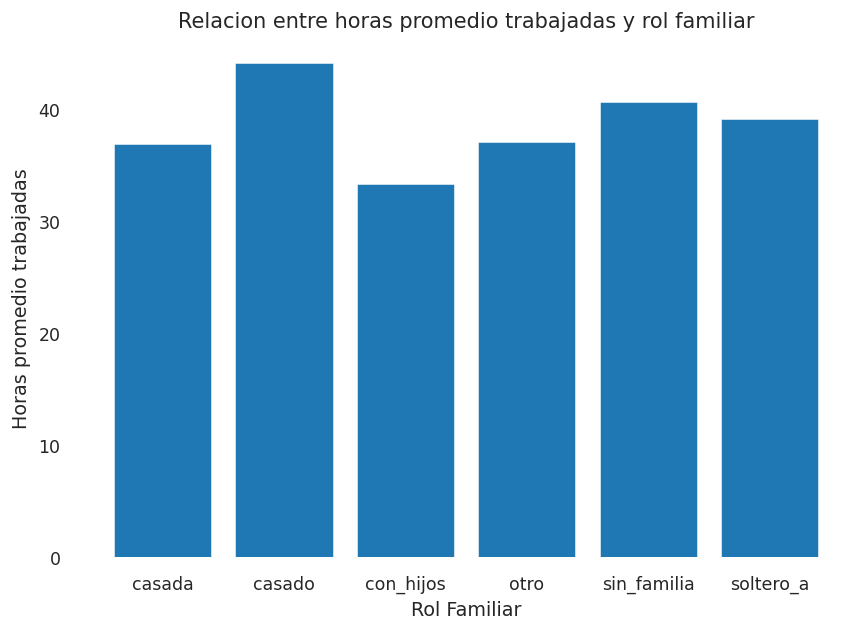

In [92]:
plt.figure(dpi=125)
plt.bar(pf.index,pf.values)
plt.xlabel("Rol Familiar")
plt.ylabel("Horas promedio trabajadas")
plt.title("Relacion entre horas promedio trabajadas y rol familiar")
plt.show()

Se observa una breve disminucion en las horas promedio trabajadas al tener hijos. Dudo mucho que esto sea util para algo